<h1><center>LOG6953C - TP1</center></h1>

In [1]:
# Vérifier la version de python utilisée
!python -V

Python 3.8.0


In [2]:
# Installation des librairies requises
%pip install qiskit[visualization] numpy prettytable

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
from qiskit import *
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from prettytable import PrettyTable

In [4]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()
inputs = QuantumRegister(2, name='inputs')
outputs = QuantumRegister(2, name='outputs')
bit_output = ClassicalRegister(2, name='bit_output')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(inputs, outputs, bit_output)

# We initialize the gates in order to create the truth table
circuit.initialize([0, 1], inputs[0])
circuit.initialize([1, 0], inputs[1])

circuit.cx(inputs[0], outputs[0])  # Apply CX gate to qubit A, B in order to get Sum output (classical XOR)
circuit.cx(inputs[1], outputs[0]) 
circuit.ccx(inputs[0], inputs[1], outputs[1])  # Apply CCX gate to qubit A, B, 0 in order to get Carry output (classical AND)



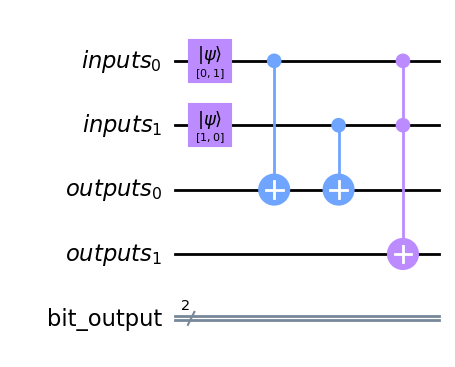

In [5]:
circuit.draw(output='mpl')

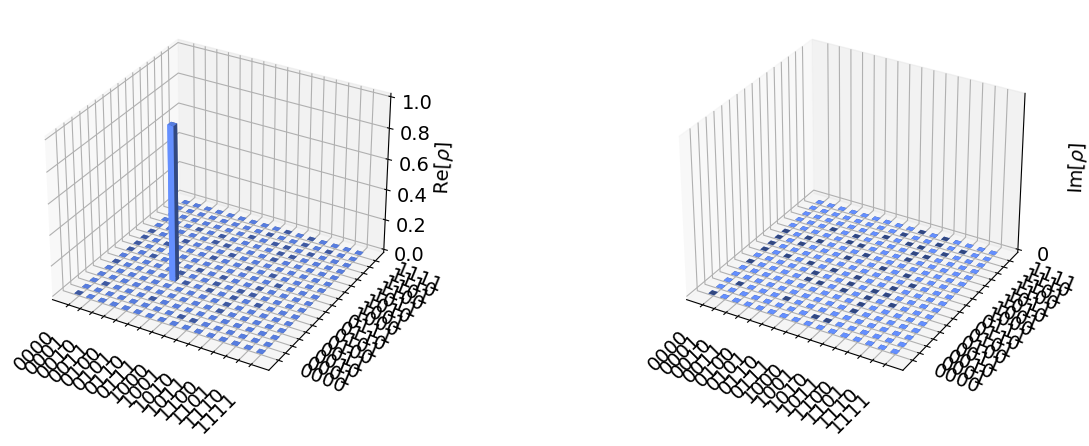

In [33]:
plot_state_city(circuit)

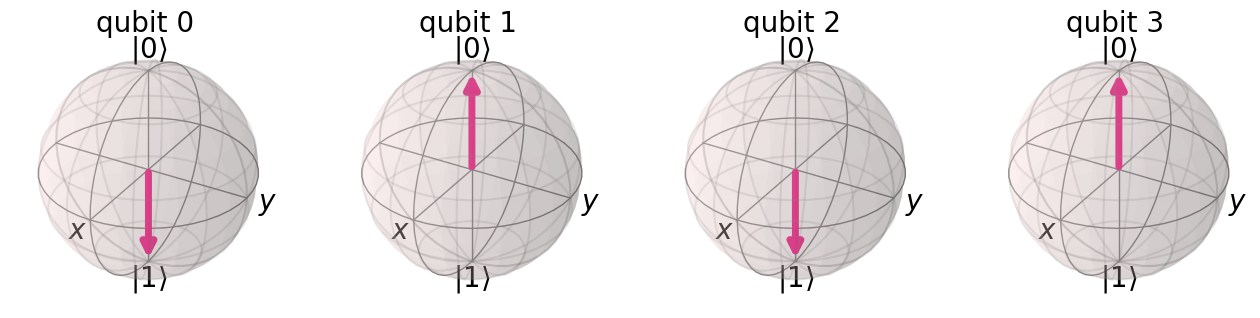

In [6]:
plot_bloch_multivector(circuit)

### Questions

Q1. Demi-additionneur quantique.

a) Implémenter une version quantique du demi-additionneur en utilisant Qiskit [35 points]

Utilisez des portes quantiques de base telles que la porte X, la porte de Hadamard, la porte CNOT
et la porte de Toffoli. À l'aide d'un simulateur quantique tel que Aer, exécutez le circuit plusieurs
fois avec différentes entrées selon la table de vérité (vous pouvez utiliser la porte Hadamard pour
générer aléatoirement différentes entrées). Fournissez un résumé statistique des résultats (vous
pouvez utiliser un tableau ou des figures) et comparez les résultats avec la table de vérité.
Fournissez les détails de votre implémentation (code et commentaires) et une visualisation du
circuit résultant.

In [7]:
print("Proof of the half-additionneur gate truth table")

table = PrettyTable()
table.field_names = ["A", "B", "Sum", "Carry", "Certainty"]

for i in [1, 0]:
    for j in [1, 0]:
        
        # Use Aer's qasm_simulator
        simulator = QasmSimulator()
        inputs = QuantumRegister(2, name='inputs')
        outputs = QuantumRegister(2, name='outputs')
        bit_output = ClassicalRegister(2, name='bit_output')

        # Create a Quantum Circuit acting on the q register
        circuit = QuantumCircuit(inputs, outputs, bit_output)

        # We initialize the gates in order to create the truth table
        circuit.initialize([i, int(not i)], inputs[0])
        circuit.initialize([j, int(not j)], inputs[1])

        circuit.cx(inputs[0], outputs[0])  # Apply CX gate to qubit A, B in order to get Sum output (classical XOR)
        circuit.cx(inputs[1], outputs[0]) 
        circuit.ccx(inputs[0], inputs[1], outputs[1])  # Apply CCX gate to qubit A, B, 0 in order to get Carry output (classical AND)

        # Map the quantum measurement to the classical bits
        circuit.measure(outputs[0], bit_output[0])  # Sum sera le bit de poids faible, à gauche dans le bitstring, donc à l'index 1 dans le bitstring
        circuit.measure(outputs[1], bit_output[1])  # Carry sera le bit de poids fort, à droite dans le bitstring, donc à l'index 0 dans le bitstring
        backend = BasicAer.get_backend('qasm_simulator')

        # Compiler
        transpile(circuit, backend)

        # Run
        job = execute(circuit, backend, shots=1000)

        count = job.result().get_counts()
        output = list(count.keys())[0]
        table.add_row([f"|{int(not i)}>", f"|{int(not j)}>", f"|{output[1]}>", f"|{output[0]}>", count[output]])

print(table)

+-----+-----+-----+-------+-----------+
|  A  |  B  | Sum | Carry | Certainty |
+-----+-----+-----+-------+-----------+
| |0> | |0> | |0> |  |0>  |    1000   |
| |0> | |1> | |1> |  |0>  |    1000   |
| |1> | |0> | |1> |  |0>  |    1000   |
| |1> | |1> | |0> |  |1>  |    1000   |
+-----+-----+-----+-------+-----------+


Les bitstring de l'Output sont représentés avec le bit de poids faible à droite. 
Ainsi, on retrouve bien la table de vérité attendue.

In [8]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()
inputs = QuantumRegister(2, name='inputs')
outputs = QuantumRegister(2, name='outputs')
bit_output = ClassicalRegister(2, name='bit_output')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(inputs, outputs, bit_output)

# Apply Hadamard gate to the qubits
circuit.h(inputs[0])  
circuit.h(inputs[1])

# Apply CX gate to qubit A, B in order to get Sum output (classical XOR)
circuit.cx(inputs[0], outputs[0])  
circuit.cx(inputs[1], outputs[0]) 

# Apply CCX gate to qubit A, B, 0 in order to get Carry output (classical AND)
circuit.ccx(inputs[0], inputs[1], outputs[1])  

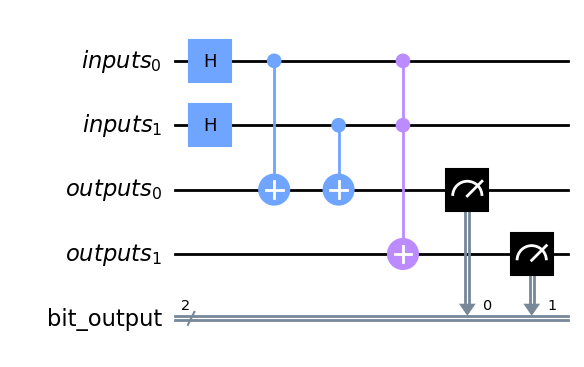

In [9]:

# Map the quantum measurement to the classical bits
circuit.measure(outputs[0], bit_output[0])  # Sum sera le bit de poids faible, à gauche dans le bitstring, donc à l'index 1 dans le bitstring
circuit.measure(outputs[1], bit_output[1])  # Carry sera le bit de poids fort, à droite dans le bitstring, donc à l'index 0 dans le bitstring

circuit.draw(output='mpl')

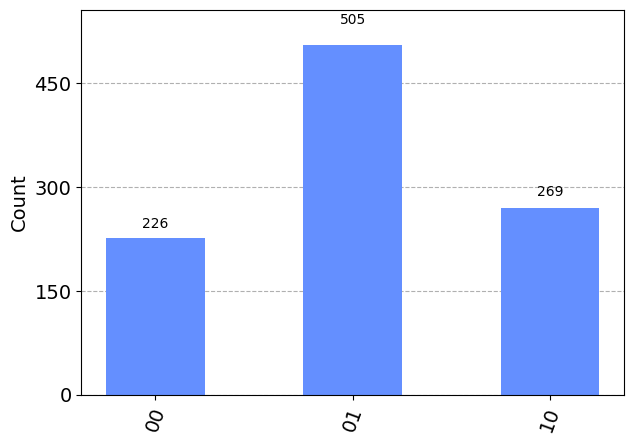

In [10]:
backend = BasicAer.get_backend('qasm_simulator')

# Compiler
transpile(circuit, backend)

# Run
job = execute(circuit, backend, shots=1000)

count = job.result().get_counts()
plot_histogram(count)

Q2. Additionneur complet quantique.
a) Implémenter la version quantique de l’additionneur complet en utilisant Qiskit [35 points]
Les exigences sont les mêmes que pour Q1.

In [21]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()
inputs = QuantumRegister(3, name='inputs')
outputs = QuantumRegister(2, name='outputs')
temp = QuantumRegister(3, name='temp')
bit_output = ClassicalRegister(2, name='bit_output')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(inputs, outputs, temp, bit_output)

# We initialize the gates in order to create the truth table
circuit.initialize([0, 1], inputs[0])
circuit.initialize([1, 0], inputs[1])
circuit.initialize([1, 0], inputs[2])

circuit.cx(inputs[0], temp[0])  # Apply CX gate to qubit A, B (classical XOR1)
circuit.cx(inputs[1], temp[0]) 

circuit.cx(temp[0], outputs[0])  # Apply CX gate to qubit Sum, C_in in order to get Sum output (classical XOR2)
circuit.cx(inputs[2], outputs[0]) 


circuit.ccx(inputs[2], temp[0], temp[1])  # Apply CCX gate to qubit A, B (classical AND2)
circuit.ccx(inputs[0], inputs[1], temp[2])  # Apply CCX gate to qubit A, B (classical AND1)

circuit.x(temp[1])
circuit.x(temp[2])
circuit.x(outputs[1])
circuit.ccx(temp[1], temp[2], outputs[1])

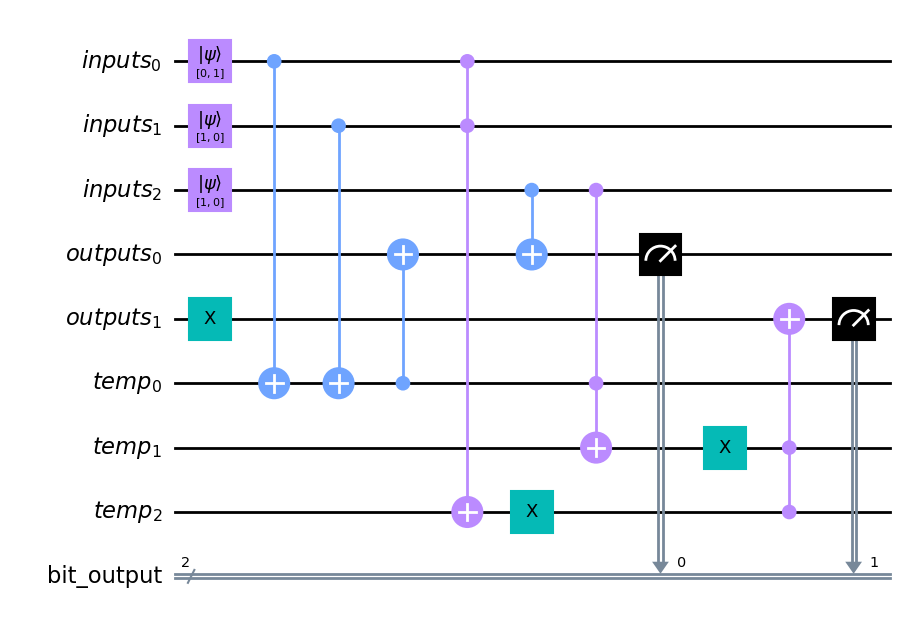

In [22]:
circuit.measure(outputs[0], bit_output[0])  # Sum sera le bit de poids faible, à gauche dans le bitstring, donc à l'index 1 dans le bitstring
circuit.measure(outputs[1], bit_output[1])  # Carry sera le bit de poids fort, à droite dans le bitstring, donc à l'index 0 dans le bitstring
circuit.draw(output='mpl')

In [23]:
print("Proof of the OR gate truth table")

table = PrettyTable()
table.field_names = ["A", "B", "Output", "Certainty"]

for i in [1, 0]:
    for j in [1, 0]:

        simulator = QasmSimulator()
        inputs = QuantumRegister(2, name='inputs')
        outputs = QuantumRegister(1, name='outputs')
        bit_output = ClassicalRegister(1, name='bit_output')

        # Create a Quantum Circuit acting on the q register
        circuit = QuantumCircuit(inputs, outputs, bit_output)

        # We initialize the gates in order to create the truth table
        circuit.initialize([i, int(not i)], inputs[0])
        circuit.initialize([j, int(not j)], inputs[1])

        circuit.x(inputs[0])
        circuit.x(inputs[1])
        circuit.x(outputs[0])
        circuit.ccx(inputs[0], inputs[1], outputs[0])

        circuit.measure(outputs[0], bit_output[0])  # Sum sera le bit de poids faible, à gauche dans le bitstring, donc à l'index 1 dans le bitstring
        backend = BasicAer.get_backend('qasm_simulator')

        # Compiler
        transpile(circuit, backend)

        # Run
        job = execute(circuit, backend, shots=10000)

        count = job.result().get_counts()
        output = list(count.keys())[0]
        table.add_row([f"|{int(not i)}>", f"|{int(not j)}>", f"|{output[0]}>", count[output]])

print(table)

Proof of the OR gate truth table
+-----+-----+--------+-----------+
|  A  |  B  | Output | Certainty |
+-----+-----+--------+-----------+
| |0> | |0> |  |0>   |   10000   |
| |0> | |1> |  |1>   |   10000   |
| |1> | |0> |  |1>   |   10000   |
| |1> | |1> |  |1>   |   10000   |
+-----+-----+--------+-----------+


In [24]:
print("Proof of the full-additionneur gate truth table")

table = PrettyTable()
table.field_names = ["A", "B", "C_in", "Sum", "Carry", "Certainty"]

for i in [1, 0]:
    for j in [1, 0]:
            for k in [1, 0]:

                # Use Aer's qasm_simulator
                simulator = QasmSimulator()
                inputs = QuantumRegister(3, name='inputs')
                outputs = QuantumRegister(2, name='outputs')
                temp = QuantumRegister(3, name='temp')
                bit_output = ClassicalRegister(2, name='bit_output')

                # Create a Quantum Circuit acting on the q register
                circuit = QuantumCircuit(inputs, outputs, temp, bit_output)

                # We initialize the gates in order to create the truth table
                circuit.initialize([i, int(not i)], inputs[0])
                circuit.initialize([j, int(not j)], inputs[1])
                circuit.initialize([k, int(not k)], inputs[2])

                circuit.cx(inputs[0], temp[0])  # Apply CX gate to qubit A, B (classical XOR1)
                circuit.cx(inputs[1], temp[0]) 

                circuit.cx(temp[0], outputs[0])  # Apply CX gate to qubit Sum, C_in in order to get Sum output (classical XOR2)
                circuit.cx(inputs[2], outputs[0]) 


                circuit.ccx(inputs[2], temp[0], temp[1])  # Apply CCX gate to qubit A, B (classical AND2)
                circuit.ccx(inputs[0], inputs[1], temp[2])  # Apply CCX gate to qubit A, B (classical AND1)

                circuit.x(temp[1])
                circuit.x(temp[2])
                circuit.x(outputs[1])
                circuit.ccx(temp[1], temp[2], outputs[1])

                circuit.measure(outputs[0], bit_output[0])  # Sum sera le bit de poids faible, à gauche dans le bitstring, donc à l'index 1 dans le bitstring
                circuit.measure(outputs[1], bit_output[1])  # Carry sera le bit de poids fort, à droite dans le bitstring, donc à l'index 0 dans le bitstring
                
                backend = BasicAer.get_backend('qasm_simulator')

                # Compiler
                transpile(circuit, backend)

                # Run
                job = execute(circuit, backend, shots=10000)

                count = job.result().get_counts()
                output = list(count.keys())[0]
                table.add_row([f"|{int(not i)}>", f"|{int(not j)}>", f"|{int(not k)}>", f"|{output[1]}>", f"|{output[0]}>", count[output]])

print(table)

Proof of the full-additionneur gate truth table
+-----+-----+------+-----+-------+-----------+
|  A  |  B  | C_in | Sum | Carry | Certainty |
+-----+-----+------+-----+-------+-----------+
| |0> | |0> | |0>  | |0> |  |0>  |   10000   |
| |0> | |0> | |1>  | |1> |  |0>  |   10000   |
| |0> | |1> | |0>  | |1> |  |0>  |   10000   |
| |0> | |1> | |1>  | |0> |  |1>  |   10000   |
| |1> | |0> | |0>  | |1> |  |0>  |   10000   |
| |1> | |0> | |1>  | |0> |  |1>  |   10000   |
| |1> | |1> | |0>  | |0> |  |1>  |   10000   |
| |1> | |1> | |1>  | |1> |  |1>  |   10000   |
+-----+-----+------+-----+-------+-----------+


In [29]:
simulator = QasmSimulator()
inputs = QuantumRegister(3, name='inputs')
outputs = QuantumRegister(2, name='outputs')
temp = QuantumRegister(3, name='temp')
bit_output = ClassicalRegister(2, name='bit_output')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(inputs, outputs, temp, bit_output)

# Apply Hadamard gate to the qubits
circuit.h(inputs[0])  
circuit.h(inputs[1])
circuit.h(inputs[2])

circuit.cx(inputs[0], temp[0])  # Apply CX gate to qubit A, B (classical XOR1)
circuit.cx(inputs[1], temp[0]) 

circuit.cx(temp[0], outputs[0])  # Apply CX gate to qubit Sum, C_in in order to get Sum output (classical XOR2)
circuit.cx(inputs[2], outputs[0]) 


circuit.ccx(inputs[2], temp[0], temp[1])  # Apply CCX gate to qubit A, B (classical AND2)
circuit.ccx(inputs[0], inputs[1], temp[2])  # Apply CCX gate to qubit A, B (classical AND1)

circuit.x(temp[1])
circuit.x(temp[2])
circuit.x(outputs[1])
circuit.ccx(temp[1], temp[2], outputs[1])

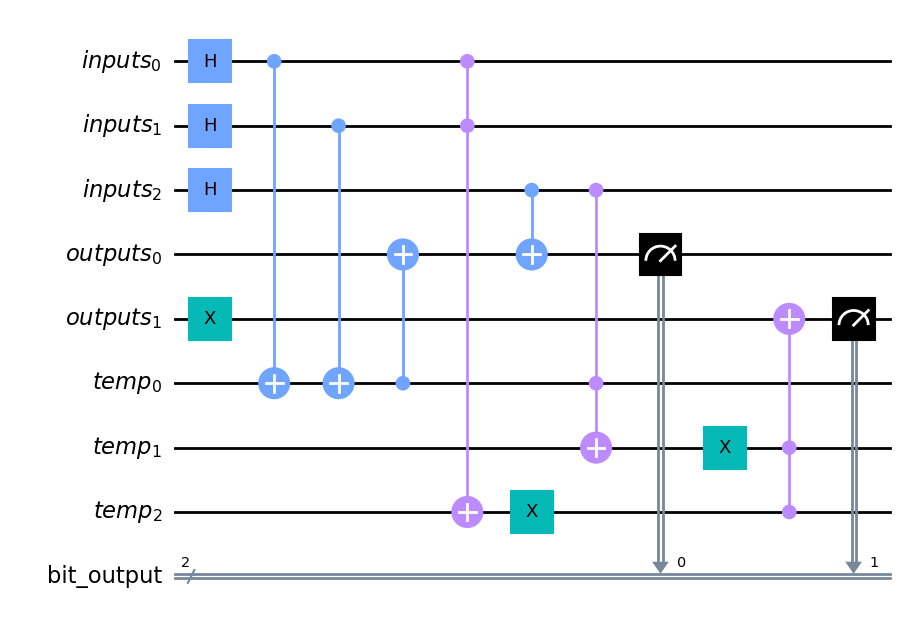

In [30]:
circuit.measure(outputs[0], bit_output[0])  # Sum sera le bit de poids faible, à gauche dans le bitstring, donc à l'index 1 dans le bitstring
circuit.measure(outputs[1], bit_output[1])  # Carry sera le bit de poids fort, à droite dans le bitstring, donc à l'index 0 dans le bitstring
circuit.draw(output='mpl')

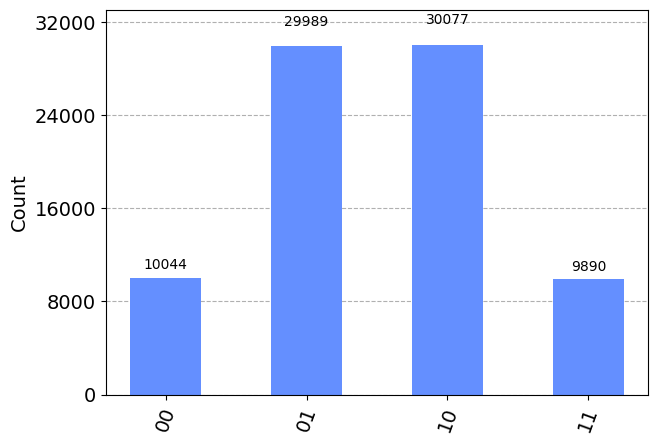

In [31]:
backend = BasicAer.get_backend('qasm_simulator')

# Compiler
transpile(circuit, backend)

# Run
job = execute(circuit, backend, shots=80000)

count = job.result().get_counts()
plot_histogram(count)